1.Top 10 produk yang paling menghasilkan                    
2.Top 10 produk untuk dijual               
3.Sales Trend           
4.Bulan berapa yang terbaik untuk melakukan penjualan            
5.Kota apa yang memiliki penjualan tertinggi                    
6.Kapan waktu yang tepat untuk melakukan periklanan

# Import Library

In [1]:
import glob
import os
import pandas as pd

files = os.path.join("C:/Users/joni/Desktop/dataset/sales/", "sales*.csv")
files = glob.glob(files)

In [2]:
#menggabungkan 12 file penjualan bulanan dalam satu dataframe
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Exploratory Data Analysis (EDA) dan Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
data = df.dropna()

In [6]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
data['Order Date'].unique()

array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33', ...,
       '09/23/19 07:39', '09/19/19 17:30', '09/30/19 00:18'], dtype=object)

In [8]:
#membersihkan data dari kata judul kolom yang terdapat dalam dataset
data['Quantity Ordered']= data['Quantity Ordered'].replace('Quantity Ordered', 0)
data['Price Each']= data['Price Each'].replace('Price Each', 0)
data['Order Date'] = data['Order Date'].replace('Order Date', '01/22/22 21:25')
data['Purchase Address'] = data['Purchase Address'].replace('Purchase Address', '944 Walnut St, Boston, MA 02215')

C:\Users\joni\AppData\Local\Temp\ipykernel_13792\3372546911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered']= data['Quantity Ordered'].replace('Quantity Ordered', 0)
C:\Users\joni\AppData\Local\Temp\ipykernel_13792\3372546911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']= data['Price Each'].replace('Price Each', 0)
C:\Users\joni\AppData\Local\Temp\ipykernel_13792\3372546911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [9]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(float)
data['Price Each'] = data['Price Each'].astype(float)

C:\Users\joni\AppData\Local\Temp\ipykernel_13792\594815627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered'] = data['Quantity Ordered'].astype(float)
C:\Users\joni\AppData\Local\Temp\ipykernel_13792\594815627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each'] = data['Price Each'].astype(float)


In [10]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [11]:
data.rename(columns = {'Price Each':'Price_Each'}, inplace = True)

C:\Users\joni\AppData\Local\Temp\ipykernel_13792\2321860466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'Price Each':'Price_Each'}, inplace = True)


In [12]:
# menghilangkan data yang memiliki harga 0
data = data[data.Price_Each > 0]
data

,Order ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price_Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [14]:
data['Month'] = pd.to_datetime(data['Order Date']).dt.month
data

C:\Users\joni\AppData\Local\Temp\ipykernel_13792\180959390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [15]:
def nama_kota (address):
    return address.split(",")[1].strip(" ")

In [16]:
data['City'] = data['Purchase Address'].apply(nama_kota)
data

C:\Users\joni\AppData\Local\Temp\ipykernel_13792\4128791524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City'] = data['Purchase Address'].apply(nama_kota)


,Order ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco


In [18]:
data['Sales'] = data['Quantity Ordered'] * data['Price_Each']
data

C:\Users\joni\AppData\Local\Temp\ipykernel_13792\1562915313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'] = data['Quantity Ordered'] * data['Price_Each']


,Order ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,City,Sales
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99


In [19]:
#top 10 produk berdasarkan penjualan 

Product_sales = data.groupby(['Product']).sum()['Sales'].sort_values(ascending=False)
Product_sales.head(10)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Sales, dtype: float64

In [20]:
#top 10 produk berdasarkan kuantitas pembelian barang 

Top_selling_product = data.groupby(['Product']).sum()['Quantity Ordered'].sort_values(ascending=False)
Top_selling_product.head(10)

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
Name: Quantity Ordered, dtype: float64

In [21]:
#berdasarkan bulan
data.groupby(['Month']).sum()

,Quantity Ordered,Price_Each,Sales
Month,,,
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
3,17005.0,2791207.83,2807100.38
4,20558.0,3367671.02,3390670.24
5,18667.0,3135125.13,3152606.75
6,15253.0,2562025.61,2577802.26
7,16072.0,2632539.56,2647775.76
8,13448.0,2230345.42,2244467.88
9,13109.0,2084992.09,2097560.13


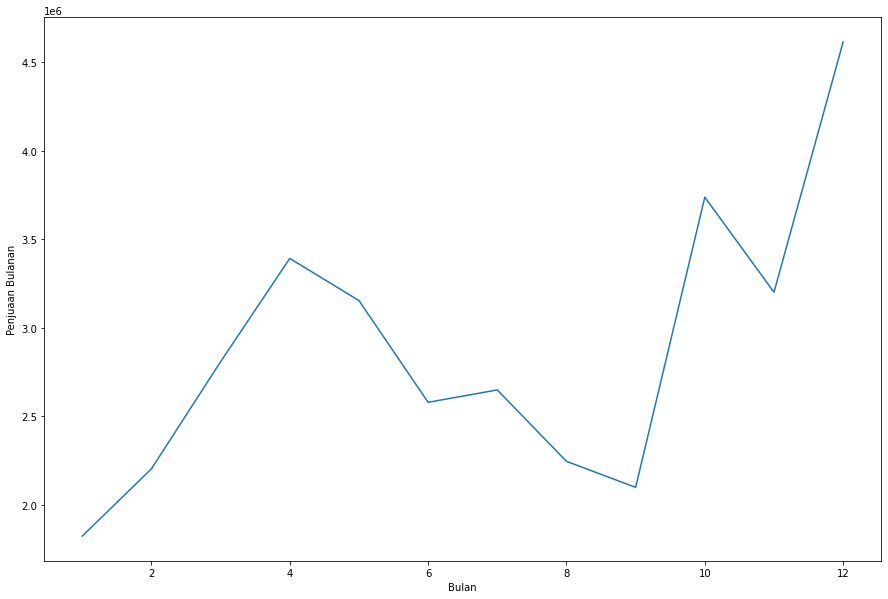

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10))
plt.plot(data.groupby(['Month']).sum()['Sales'])
plt.ylabel('Penjuaan Bulanan')
plt.xlabel('Bulan')
plt.show()

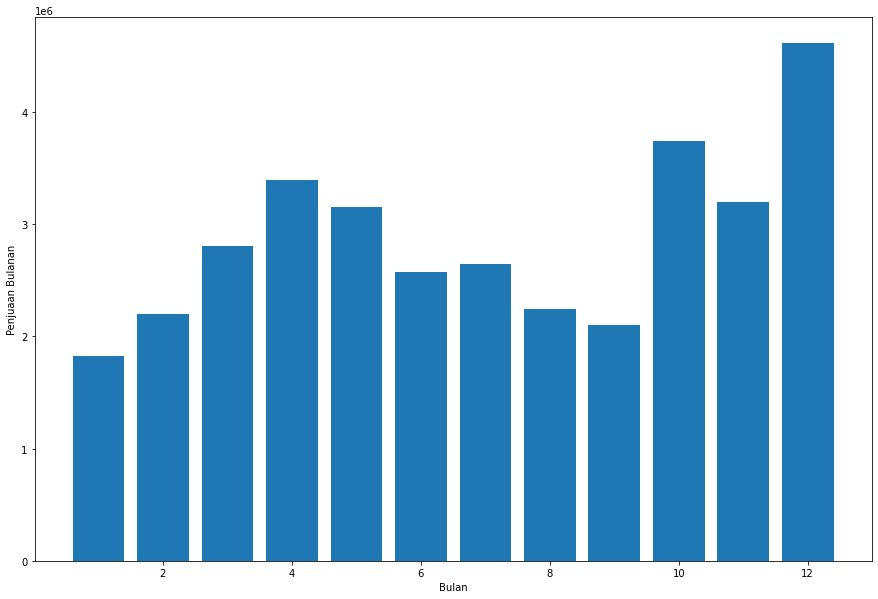

In [23]:
Month = range(1,13)

figure(figsize=(15, 10))
plt.bar(Month, data.groupby(['Month']).sum()['Sales'])
plt.ylabel('Penjuaan Bulanan')
plt.xlabel('Bulan')
plt.show()

In [24]:
#kota yang melakukan penjualan terbanyak
data.groupby(['City']).sum()

,Quantity Ordered,Price_Each,Month,Sales
City,,,,
Atlanta,16602.0,2779908.20,104794,2795498.58
Austin,11153.0,1809873.61,69829,1819581.75
Boston,22528.0,3637409.77,141112,3661642.01
Dallas,16730.0,2752627.82,104620,2767975.40
Los Angeles,33289.0,5421435.23,208325,5452570.80
New York City,27932.0,4635370.83,175741,4664317.43
Portland,14053.0,2307747.47,87765,2320490.61
San Francisco,50239.0,8211461.74,315520,8262203.91
Seattle,16553.0,2733296.01,104941,2747755.48


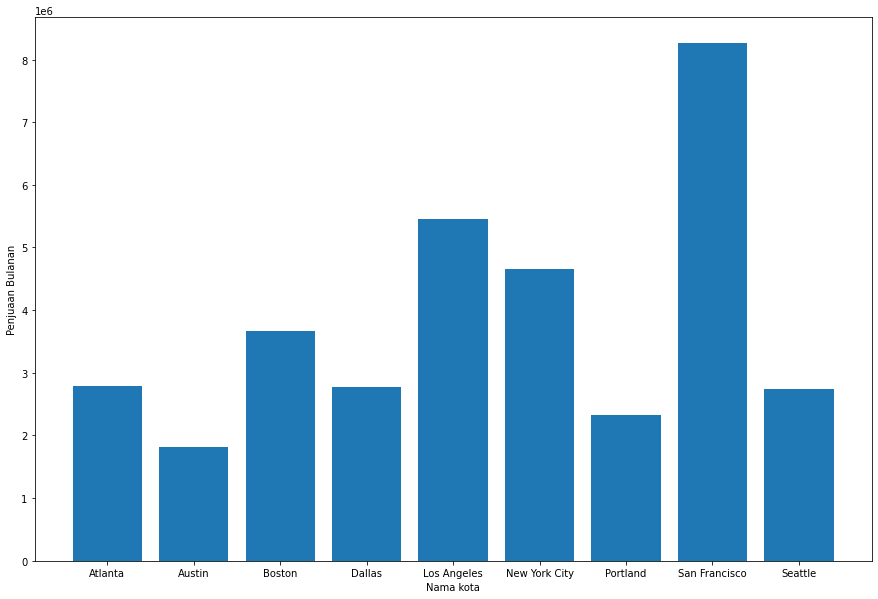

In [25]:
figure(figsize=(15, 10))
cities = [City for City, data in data.groupby(['City'])]
plt.bar(cities, data.groupby(['City']).sum()['Sales'])
plt.ylabel('Penjuaan Bulanan')
plt.xlabel('Nama kota')
plt.show()

In [26]:
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour
data

C:\Users\joni\AppData\Local\Temp\ipykernel_13792\3174884338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour


,Order ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,City,Sales,Hour
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,700.00,21
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,14.95,14
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,23.98,13
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,149.99,20
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,11.99,11
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97,20
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00,16
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00,7
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99,17


In [27]:
data.groupby(['Hour']).sum()

,Quantity Ordered,Price_Each,Month,Sales
Hour,,,,
0,4428.0,709296.70,27554,713721.27
1,2619.0,458490.00,16657,460866.88
2,1398.0,233833.64,8507,234851.44
3,928.0,144726.42,5904,145757.89
4,937.0,162058.18,6148,162661.01
5,1493.0,229621.21,9301,230679.82
6,2810.0,445000.11,17539,448113.00
7,4556.0,740568.11,28850,744854.12
8,7002.0,1185970.62,43626,1192348.97


In [28]:
#waktu yang tepat untuk melakukan pengiklanan
time_for_advertisement = data.groupby(['Hour']).sum()['Quantity Ordered'].sort_values(ascending=False)
time_for_advertisement

Hour
19    14470.0
12    14202.0
11    14005.0
18    13802.0
20    13768.0
13    13685.0
14    12362.0
10    12308.0
21    12244.0
17    12229.0
16    11662.0
15    11391.0
22     9899.0
9      9816.0
23     7065.0
8      7002.0
7      4556.0
0      4428.0
6      2810.0
1      2619.0
5      1493.0
2      1398.0
4       937.0
3       928.0
Name: Quantity Ordered, dtype: float64

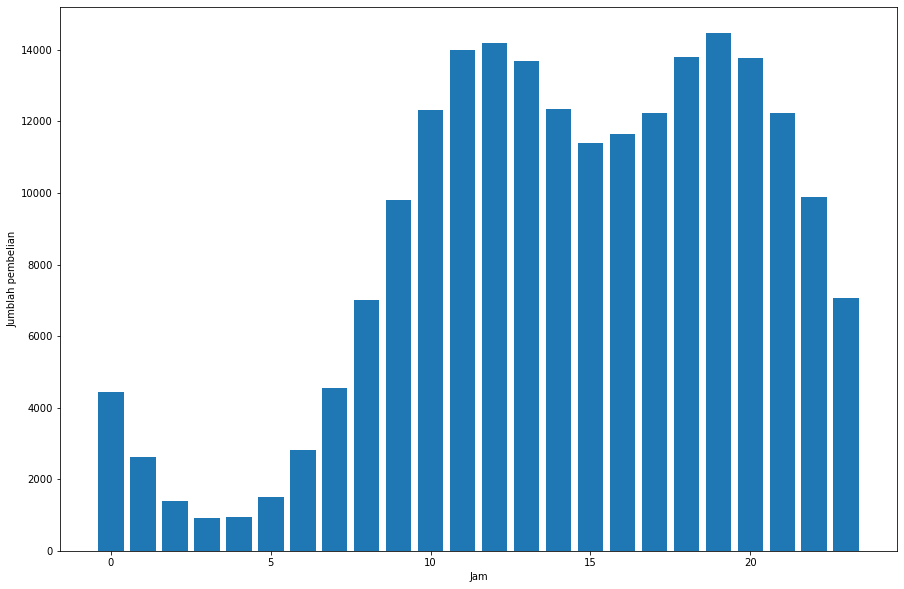

In [29]:
Hour = range(0,24)

figure(figsize=(15, 10))
plt.bar(Hour, data.groupby(['Hour']).sum()['Quantity Ordered'])
plt.ylabel('Jumblah pembelian')
plt.xlabel('Jam')
plt.show()